# TORCH_GEOMETRIC.NN

SEOYEON CHOI  
12/5/22

221207

https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html

In [1]:
import torch
from torch_geometric.data import Data

In [2]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

In [3]:
data

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

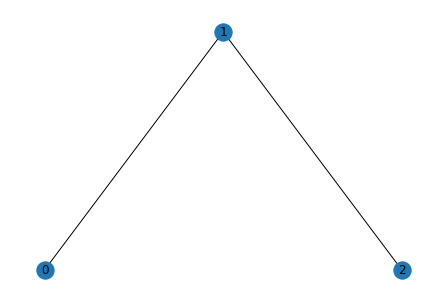

In [5]:
G=nx.Graph()
G.add_node('0')
G.add_node('1')
G.add_node('2')
G.add_edge('0','1')
G.add_edge('1','2')
pos = {}
pos['0'] = (0,0)
pos['1'] = (1,1)
pos['2'] = (2,0)
nx.draw(G,pos,with_labels=True)
plt.show()

In [6]:
from torch.nn import Linear, ReLU
from torch_geometric.nn import Sequential, GCNConv

ex

``` python
model = Sequential('x, edge_index', [
    (GCNConv(in_channels, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    Linear(64, out_channels),
])
```

In [7]:
model = Sequential('x, edge_index', [
    (GCNConv(3, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    Linear(64, 3),
])

In [ ]:
model(x,edge_index)

In [9]:
from torch.nn import Linear, ReLU, Dropout
from torch_geometric.nn import Sequential, GCNConv, JumpingKnowledge
from torch_geometric.nn import global_mean_pool

``` python
model = Sequential('x, edge_index, batch', [
    (Dropout(p=0.5), 'x -> x'),
    (GCNConv(dataset.num_features, 64), 'x, edge_index -> x1'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x1, edge_index -> x2'),
    ReLU(inplace=True),
    (lambda x1, x2: [x1, x2], 'x1, x2 -> xs'),
    (JumpingKnowledge("cat", 64, num_layers=2), 'xs -> x'),
    (global_mean_pool, 'x, batch -> x'),
    Linear(2 * 64, dataset.num_classes),
])
```

In [ ]:
model = Sequential('x, edge_index, batch', [
    (Dropout(p=0.5), 'x -> x'),
    (GCNConv(dataset.num_features, 64), 'x, edge_index -> x1'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x1, edge_index -> x2'),
    ReLU(inplace=True),
    (lambda x1, x2: [x1, x2], 'x1, x2 -> xs'),
    (JumpingKnowledge("cat", 64, num_layers=2), 'xs -> x'),
    (global_mean_pool, 'x, batch -> x'),
    Linear(2 * 64, dataset.num_classes),
])

In [ ]:
torch_geometric.nn.Linear()